# Basics on Python and Quantum Computing
###### By: J. A. Orduz-Ducuara

## QSVM model with data!  It is not Working

We import the libraries or modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We plot the data set

In [2]:
df_sgnl=pd.read_csv("data/signal.csv")
df_bckgrnd=pd.read_csv("data/background.csv")
type(df_sgnl)
type(df_bckgrnd)

pandas.core.frame.DataFrame

We export data frame pandas to array in numpy.

In [3]:
n_samples=100
np_Array_signal = df_sgnl[0:n_samples].to_numpy()
type(np_Array_signal)

numpy.ndarray

We pick two columns associated to A, two more associated to B, and so on.

In [4]:
AA=np_Array_signal[:,[1,5,9,19]] # t_0_pT, t_1_pT, b_0_pT, h_tt_pT

In [5]:
feature = np.concatenate([AA[:,1], AA[:,0], AA[:,3], AA[:,2]], axis=0)/4
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))

100


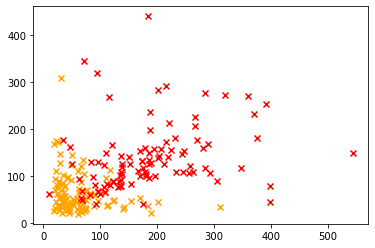

In [6]:

np.random.shuffle(data)
print(len(data))
plt.scatter(AA[:,1], AA[:,0], marker='x',color = "orange")
plt.scatter(AA[:,3], AA[:,2], marker='x',color = "red")

plt.show()

In [7]:
porcentaje_train = 0.8
m = int(porcentaje_train * n_samples)


x_train = np.array([data[i][0] for i in range(m)])
y_train = np.array([data[i][1] for i in range(m)])

x_test = np.array([data[i][0] for i in range(m,n_samples)])
y_test = np.array([data[i][1] for i in range(m,n_samples)])
type(x_train)

numpy.ndarray

In [8]:
import pennylane as qml
from time import time
from sklearn import svm
import scipy

In [9]:
n = x_train.shape[0]
m=2
@qml.template
# I can modify: from here
# feature map is the $\phi$ function (ZZmap of IBM))
def feature_map(x):
    for i in range(m):
        qml.Hadamard(wires = i)


    qml.RZ(2*x[0], wires = 0)
    qml.RZ(2*x[1], wires = 1)
    qml.CNOT(wires = [0,1])
    qml.RZ(2*(np.pi - x[0])*(np.pi - x[1]), wires = 1)
    qml.CNOT(wires = [0,1])
# I can modify: to here

In [10]:
dev = qml.device("default.qubit", wires = m)      

In [11]:
@qml.qnode(dev)
def circuit(x,y):
    feature_map(y)
    qml.adjoint(feature_map)(x)
    return qml.probs(wires = range(n))

In [12]:
# devuelve el valor final del producto interno
def scalar_product(x,y):
    probs = circuit(x,y)
    return probs[0]

# References

In [13]:
def KernelGramMatrixFull(X1, X2):
    print("Calculing Gram matrix")

    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        print(int(i / len(X1) *100), "%")
        for j, x2 in enumerate(X2):
            
            x1 = x1.flatten()
            x2 = x2.flatten()
            
            gram_matrix[i, j] = scalar_product(x1,x2)
            
    return gram_matrix

In [14]:
from sklearn import svm

clf = svm.SVC(kernel="precomputed")


In [15]:
matrix = KernelGramMatrixFull(x_train, x_train)

Calculing Gram matrix
0 %


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
print("training...")
clf.fit(matrix, y_train)


training...


NameError: name 'matrix' is not defined

In [ ]:
#test
print("testing...")

sol = clf.predict(KernelGramMatrixFull(x_test,x_train))

success = 0
for i in range(len(y_test)):
    if sol[i] == y_test[i]:
        success += 1
        
print("Test precision: ", success/len(sol)*100, "%")

testing...
Calculando matriz de Gram
0 %


IndexError: index 1 is out of bounds for axis 0 with size 1

[1] NB: https://tinyurl.com/y6nrumjv

[2] tutorial: https://tinyurl.com/y69xw546